In [1]:
!pip install /kaggle/input/ml-models/package/dist/mlmodels-1.0-py2.py3-none-any.whl

Processing /kaggle/input/ml-models/package/dist/mlmodels-1.0-py2.py3-none-any.whl


In [2]:
import os,warnings;
warnings.filterwarnings("ignore")
import numpy as np;
import pandas as pd;import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
from mlmodels.gpr_bclassifier import GPRC
%matplotlib inline

FEATURES
1. age | Number of years a person has lived
2. sex | Gender of patient (Male:1/Female:0)
3. cp | Chest Pain type (4 values)
4. trestbps | Resting Blood Pressure
5. chol | serum cholestoral in mg/dl
6. fbs | Fasting Blood Sugar > 120 mg/dl
7. restecg | Resting Electrocardiographic (ECG) results (values 0,1,2)
8. thalach | Maximum Heart Rate Achieved
9. exang | Exercise Induced Angina
10. oldpeak | oldpeak = ST depression induced by exercise relative to rest
11. slope | the slope of the peak exercise ST segment
12. ca | number of major vessels (0-3) colored by flourosopy
13. thal | Thalium stress test results: 3 = normal; 6 = fixed defect; 7 = reversable defect

TARGET VARIABLE
Target Variable, from original dataset
condition: diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing (negative for disease)
Value 1: > 50% diameter narrowing (positive for disease) </div>

# EDA

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

# FIRST IMPRESSION SUMMARY
info() suggests we have a full dataset w/ no missing values
head() suggests the categorical features described above are already converted for us
.value_counts() suggest out binary classifcation problem is well balanced & a metric like accuracy is quite approapriate here.

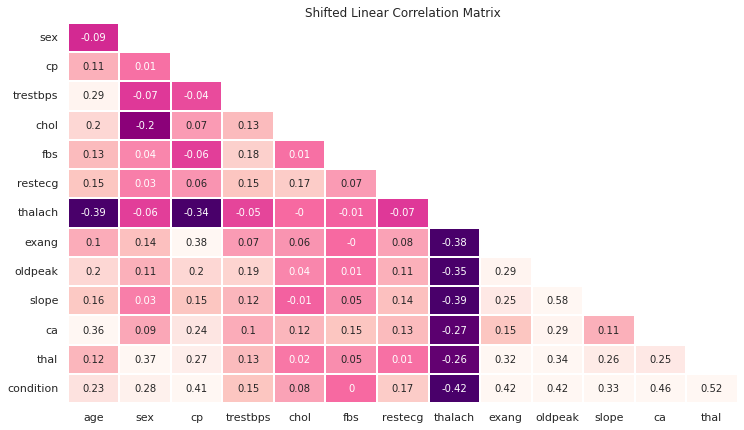

In [7]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

# CONDITION variable has a relatively broad range of correlated features:
Amongst the higher positively correlated features;thal,ca,oldpeak,exang,cp; (0.52,0.46,0.42,0.41)
Only one feature is negatively correlated to the target variable; thalach (-0.42)
The only feature that has little to no linear correlation to target variable:fbs (0.0)

In [8]:
''' CountPlot Histograms '''

plt4 = ['#E379B2','#6351BB']
def plot1count(x,xlabel,palt):
    
    plt.figure(figsize=(20,2))
    sns.countplot(x=x,hue='condition', data=df, palette=palt)
    plt.legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
    
def plot1count_ordered(x,xlabel,order,palt):
    
    plt.figure(figsize=(20,2))
    sns.countplot(x=x,hue='condition',data=df,order=order,palette=palt)
    plt.legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

def plot2count(x1,x2,xlabel1,xlabel2,colour,rat,ind1=None,ind2=None):
    
    # colour, ratio, index_sort

    fig,ax = plt.subplots(1,2,figsize=(20,3),gridspec_kw={'width_ratios':rat})
    # Number of major vessels (0-3) colored by flourosopy
    sns.countplot(x=x1,hue='condition',data=df,order=ind1,palette=colour,ax=ax[0])
    ax[0].legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='upper right')
    ax[0].set_xlabel(xlabel1)
    ax[0].set_ylabel('Frequency')

    # Defect Information (0 = normal; 1 = fixed defect; 2 = reversable defect )
    sns.countplot(x=x2,hue='condition', data=df,order=ind2,palette=colour,ax=ax[1])
    ax[1].legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='best')
    ax[1].set_xlabel(xlabel2)
    ax[1].set_ylabel('Frequency')
    plt.show()
    
''' Plot n Countplots side by side '''
def nplot2count(lst_name,lst_label,colour,n_plots):
    
    ii=-1;fig,ax = plt.subplots(1,n_plots,figsize=(20,3))
    for i in range(0,n_plots):
        ii+=1;id1=lst_name[ii];id2=lst_label[ii]
        sns.countplot(x=id1,hue='condition',data=df,palette=colour,ax=ax[ii])
        ax[ii].legend(["<50% diameter narrowing", ">50% diameter narrowing"],loc='upper right')
        ax[ii].set_xlabel(id2)
        ax[ii].set_ylabel('Frequency')

# Feature Bivariate Histograms
GENERAL FEATURE & PAIN RELATED FEATURES

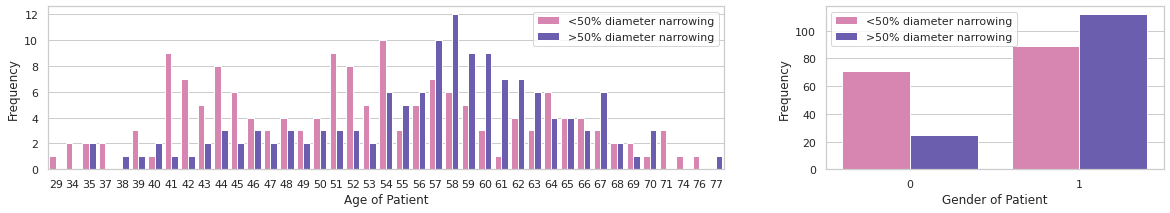

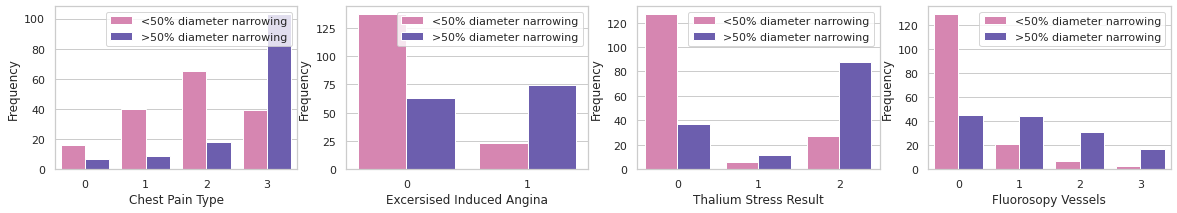

In [9]:
plot2count('age','sex','Age of Patient','Gender of Patient',plt4,[2,1])
lst1 = ['cp','exang','thal','ca']
lst2 = ['Chest Pain Type','Excersised Induced Angina','Thalium Stress Result','Fluorosopy Vessels']
nplot2count(lst1,lst2,plt4,4)

Age & Sex; Linear Correlation (0.23,0.28)
Age group between [29,54]; increase in frequency for a <50% cases target value.
Age group between [55,63]; distinctly larger proportion of >50%
Aside from a couple of patients in the age group 71 to 76, >50% is much more populated for the higher age group, therefore identifying them are the higher risk patients
Sex Distribution suggests; male are more likely to have an association with >50%
women patient also had much more even distribution of >50% & <50% cases, compared to male.

Chest Pain Type; Linear Correlation (-0.41)
>50% patients actually are associated with no chest pain symptoms as is seen in the data.

Excercise Induced Angina; Linear Correlation (0.42)
Higher values of exang are associated with higher values of condition (>50%)

Major Coloured Vessels; Linear Correlation (0.46)
Higher values of coloured major vessels are associated with target variabe >50%

ECG RELATED FEATURES

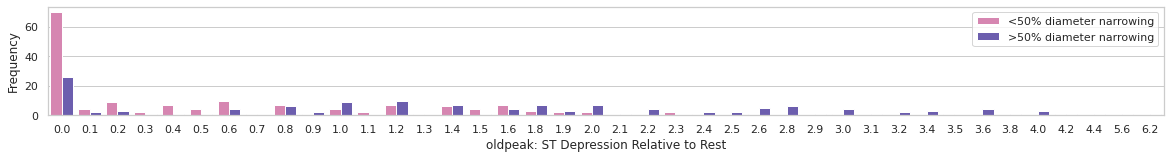

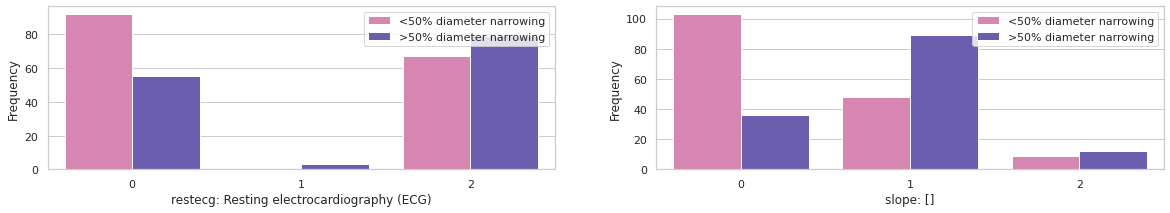

In [10]:
lst_ecg = ['oldpeak','restecg','slope','condition']
plot1count('oldpeak','oldpeak: ST Depression Relative to Rest',plt4)
plot2count('restecg','slope','restecg: Resting electrocardiography (ECG)','slope: []',plt4,[1,1])

BLOOD RELATED FEATURES

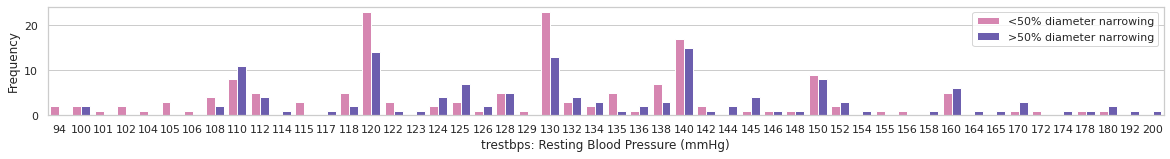

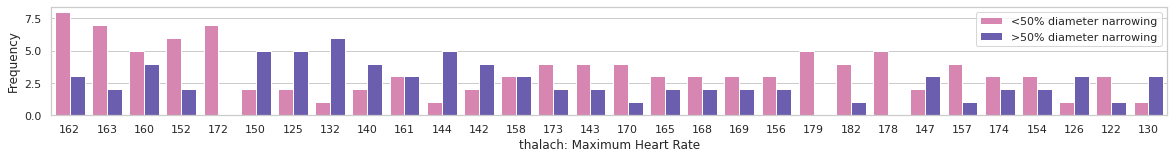

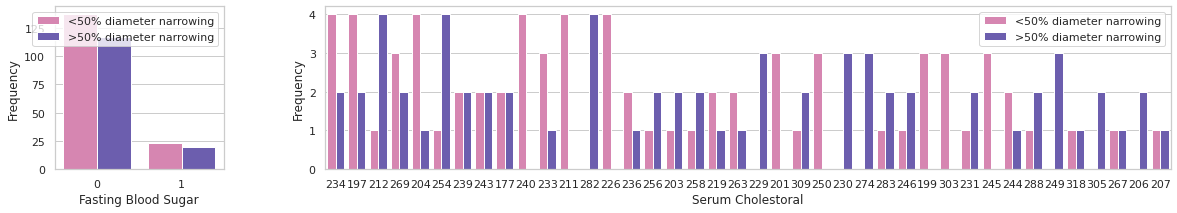

In [11]:
lst_blood = ['trestbps','thalach','fbs','chol','condition']
plot1count('trestbps','trestbps: Resting Blood Pressure (mmHg)',plt4)
plot1count_ordered('thalach','thalach: Maximum Heart Rate',df['thalach'].value_counts().iloc[:30].index,plt4)
plot2count('fbs','chol','Fasting Blood Sugar','Serum Cholestoral',plt4,[2,10],None,df['chol'].value_counts().iloc[:40].index)

SUMMARY - FEATURE BASED MODELS
Numerical Features: age,oldpeak,trestbps,thalach,chol
Categorical Features: sex,restecg,slope,fbs,cp,exang,thal,ca
As we have a few categorical features that have been converted into numerical for us, we should question whether each of the categories is weighted correctly, as they are simply ordered from 0.
Higher values may indicate a larger weight, which may not be correct when features are used in the model. So let's opt for a OneHotEncoding approach to split these categorical features into separate features.

In [12]:
lst_ohe_feat = ['sex','restecg','slope','fbs','cp','exang','thal','ca']
lst_ohe_out = []
for i in lst_ohe_feat:
    tdf = pd.get_dummies(df[i],i)
    lst_ohe_out.append(tdf)
    
lst_ohe_out.append(df['condition'])
df_ohe = pd.concat(lst_ohe_out,axis=1) # One Hot Encoding Features df

# Pair Grids

In [13]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False,hue='condition',palette='Purples')
    g.fig.set_size_inches(13,13)
    g.map_upper(sns.kdeplot,n_levels=5)
    g.map_diag(sns.kdeplot, lw=2)
    g.map_lower(sns.scatterplot,s=20,edgecolor="k",linewidth=1,alpha=0.6)
    g.add_legend()
    plt.tight_layout()

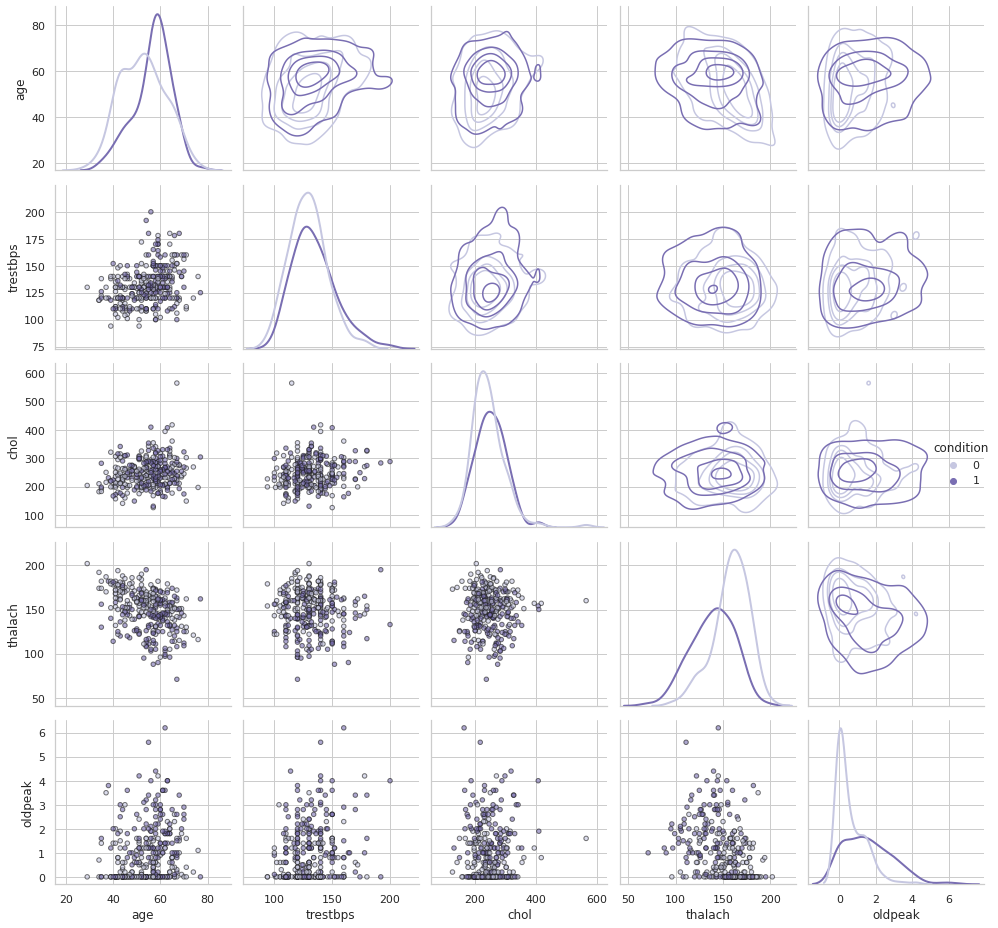

In [14]:
# We actually have only 5 continuous numerical features, the rest are categorical numbers
numvars_targ = ['age','trestbps','chol','thalach','oldpeak','condition']
snsPairGrid(df[numvars_targ])

CONDITION : 0:<50%, 1:>50%
A lot of overlap in variables in the features, most notably chol & trestbps look quite similar in distribution
oldpeak,thalach,age are features with most variation in target variable condition.
oldpeak is an interesting feature where a large variation in condition exists:

a lot of >50% cases have an elevated oldpeak
age group isn't really a factor in elevated oldpeak values
chol levels don't seem too out of the ordinary for these elevated cases
thalach levels tend to be lower, two visibles centres emerge on the KDE relation, indicating a linear relation

# Gaussian Process Classifier

The GPRC() class contains a very simplistic classification addition to the Regressor model based on the closest distance to each class.
The GP model has the ability to accurately adapt to data it is provided in a high dimensional space. How the model behaves is dependent on its hyperparameter selection:
Each hyperparameter has it's own role in how it changes the model, with its core being the covariance matrix; defining all of the instance relation weights in a neat matrix format. Multiple covariance matrices have to be constructed to make a prediction, including matrix inversions, yet GP is the cheaper variant of all models associated with it.


TRAINING THE GPRC() MODEL .fit(X,y)
Setting hyperparameters & calculating the training covariance matrixself.Kmat
Specific to the classifier, all unique target values are defined
Hyperparameters can be both set in the manner outlined above, or tuned based on a specific objective function.
Various objective functions exist, the full likelihood & simplified variant is included,
Scipy's optimize.minimize class is used together with the L-BFGS-B approach to find the minimum.
MAKING A PREDICTION USING GPRC() MODEL .predict(X)
The Covariance Matrix for Training & Test Feature Matrices needs to be calculated.
Commonly referred to as the posterior mean is the main model prediction output.
Specific to the classifier, the nearest class to each prediction is found.
SKLEARN DEFAULT EVALUATION METRIC .score()
When using ClassifierMixin in an sklearn compatible class, the default metric when calling .score in our pipelines and evaluations will be accuracy.

In [15]:
''' Draw a single Heatmap using Seaborn '''
def heatmap1(values,xlabel,ylabel,xticklabels,yticklabels,
             cmap='plasma',vmin=None,vmax=None,fmt="%0.2f",title=None):

    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(values, ax=ax,cmap=cmap,cbar=True)
    
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
    ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    ax.set_title(title)
    ax.set_aspect(1)
    
    for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
        
''' Plot Several Seaborn Heatmaps Side by Side '''
def heatmapn(n,values,labels,ticklabels,titles,
              cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

    ii=-1
    fig,ax = plt.subplots(1,n,figsize=(15,5))
    for i in range(0,n):
        ii+=1
        tval = values[ii];ttitle = titles[ii]
    
        sns.heatmap(tval,ax=ax[ii],cmap=cmap,cbar=True) 
        img = ax[ii].pcolor(tval, cmap=cmap, vmin=vmin, vmax=vmax)
        img.update_scalarmappable()
        ax[ii].set_xlabel(labels[0]);ax[ii].set_ylabel(labels[1])
        ax[ii].set_xticks(np.arange(len(ticklabels[0])) + 0.5)
        ax[ii].set_yticks(np.arange(len(ticklabels[1])) + 0.5)
        ax[ii].set_xticklabels(ticklabels[0]);ax[ii].set_yticklabels(ticklabels[1])
        ax[ii].set_title(ttitle)
        ax[ii].set_aspect(1)
    
        # color of each matrix content
        for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.mean(color[:3]) > 0.5:
                c = 'k'
            else:
                c = 'w'
            ax[ii].text(x, y, fmt % value, color=c, ha="center", va="center")

# Classification Models
# Based on ECG Features
EDA investigation into ECG features revealed they have a good mix of correlation values to the target variable condition; restecg(0.17),oldpeak(0.42),slope(0.33).
Let's investigate if it's viable to implement condition prediction based on subset feature data
Then, since we have a few features, we can incorporate PolynomialFeatures() of a high order without drastically increasing the computational cost, StandardScaler() as well is added in the Poly() Pipeline.

# GPC MODEL /W GRIDSEARCHCV (MANUAL THETA,SIGMA)
The assumption is that the our data has a relatively low noise level & training data are with minimal errors, sigma_n=0.01

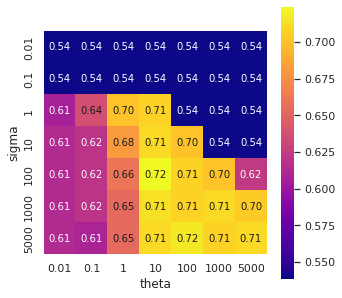

In [16]:
from sklearn.model_selection import GridSearchCV,cross_val_score

lst_theta = [0.01, 0.1, 1, 10, 100, 1000, 5000]
lst_sig = [0.01, 0.1, 1, 10, 100, 1000, 5000]

def modelEval(ldf,lst_theta,lst_sig,feature='condition'):

    # Given a dataframe, split feature/target variable
    X = ldf.copy()
    y = ldf[feature].copy()
    del X[feature]
    
    # define parameters for gridsearch (theta,sigma)
    param_grid = {'theta': lst_theta,'sigma': lst_sig}
    
    # split dataset into 5 segments, fit & predict fo each segment
    model = GPRC(opt=False)  # manual hyperparameter model
    model.fit(X,y)

    gscv = GridSearchCV(model,param_grid,cv=5) # 5 fold CV
    gscv.fit(X.values,y.values)
    results = pd.DataFrame(gscv.cv_results_) 
    scores = np.array(results.mean_test_score).reshape(7,7)
    
    # plot the cross validation mean scores of the 5 fold CV
    heatmap1(scores,xlabel='theta',xticklabels=param_grid['theta'],
                    ylabel='sigma',yticklabels=param_grid['sigma'])
    
ldf1 = df[lst_ecg] # subset of ecg features
modelEval(ldf1,lst_theta,lst_sig)

# GPC MODEL /W GRIDSEARCHCV (MANUAL THETA,SIGMA) + POLYNOMIALFEATURES()

Additional to the previous assumption, effects of PolynomialFeatures() of 2nd & 7th order are investigated in a Pipeline() w/ StandardScaler()

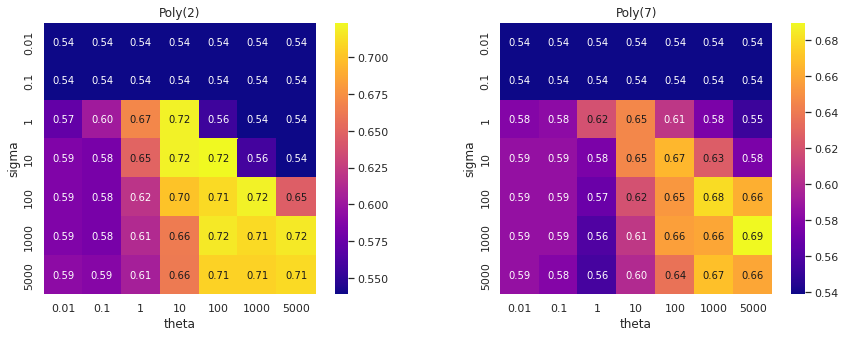

In [17]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

lst_theta = [0.01, 0.1, 1, 10, 100, 1000, 5000]
lst_sig = [0.01, 0.1, 1, 10, 100, 1000, 5000]

# Model Evaluation Function for Polynomial Feature Pipeline
def modelEval2(ldf,lst_theta,lst_sig,feature='condition'):

    # Given a dataframe, split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    tlst = []
    for i in [2,7]:
    
        # create a pipeline combining a polynomial feature 
        pipe = Pipeline(steps=[('scaler',StandardScaler()),
                               ('poly',PolynomialFeatures(i)),
                               ('model',GPRC(opt=False))])

        # pipepines require slightly different notations w/ __
        param_grid = {'model__theta': lst_theta,'model__sigma': lst_sig}

        gscv2 = GridSearchCV(pipe,param_grid,cv=10)
        gscv2.fit(X,y)
        ypred = gscv2.predict(X)
        results2 = pd.DataFrame(gscv2.cv_results_)
        scores2 = np.array(results2.mean_test_score).reshape(7,7)
        tlst.append(scores2)
    
    lst_lab = ['theta','sigma'];lst_tit = ['Poly(2)','Poly(7)']
    lst_tick = [param_grid['model__theta'],param_grid['model__sigma']]
    
    # Plot two Heatmaps side by side for the two Polynomial
    heatmapn(n=2,values=tlst,labels=lst_lab,ticklabels=lst_tick,titles=lst_tit)

modelEval2(ldf1,lst_theta,lst_sig)

# GPC MODEL (THETA=10,SIGMA=100) /W TRAIN_TEST_SPLIT
Having conducted a cross validation, let's determine the score for a 70/30 split using theta=10,sigma=100

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def modelEval3(ldf,hyp,pred_upd,feature='condition'):

    # Given a dataframe, split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=73)

    lst_mu = []
    if(pred_upd!=None):
        model = GPRC(theta=hyp[0],sigma=hyp[1],opt=False,mu_in=pred_upd)
    else:
        model = GPRC(theta=hyp[0],sigma=hyp[1],opt=False)

    model.fit(X_train,y_train)
    model.predict(X_train.values);lst_mu.append(model.mu_s)
    model.predict(X_test.values);lst_mu.append(model.mu_s)
    print(f'Training Score: {model.score(X_train.values,y_train.values)}')
    print(f'Test Score: {model.score(X_test.values,y_test.values)}')
    
    if(pred_upd==None):
        return lst_mu
            
lst_ldf1 = modelEval3(ldf1,hyp=[10,100],pred_upd=None)

Training Score: 0.7391304347826086
Test Score: 0.7222222222222222


# SUMMARY - ECG MODELS
ECG features whilst being important, don't seem like the only features that are needed to create a reasonable model for the prediction of target variable condition. The addition of more features will likely improve the model
The ECG feature model reached only a peak mean cross validation score of 0.72 using 10-fold CV
The addition of polynomial features didn't improve the model
Standard train_test_split resulted in a very similar training and test scores (0.74,0.72)

# Blood Features Related
Features trestbps,thalach,fbs,chol are available relating to blood samples, let's use the previously used function modelEval to build a basic CrossValidationCV model using them.
Let's also try a simple ensemble approach, using the exported posterior mean from the ECG model & import it into the new model.
Like ECG, the correlation of various associated features is quite widespread, not too low or highly correlated to target variable, condition, so perhaps we might get a better model.

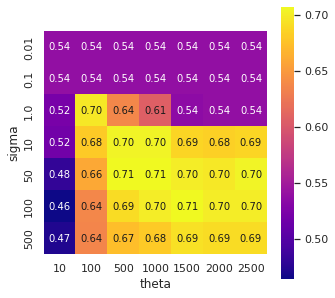

In [19]:
''' Cross Validation '''
lst_theta = [10,100, 500, 1000, 1500, 2000, 2500]
lst_sig = [0.01,0.1,1.0,10,50,100, 500]

ldf2 = df[lst_blood]
modelEval(ldf2,lst_theta,lst_sig)

In [20]:
''' Train/Test Split w/  '''
lst_ldf2 = modelEval3(ldf2,hyp=[1000,50],pred_upd=None)

Training Score: 0.6956521739130435
Test Score: 0.6888888888888889


In [21]:
''' Ensemble Modification Train/Test Split'''
# lst_ldf1 : ECG based model prediction
modelEval3(ldf2,hyp=[1000,50],pred_upd=lst_ldf1)

Training Score: 0.7391304347826086
Test Score: 0.7666666666666667


# SUMMARY - BLOOD RELATED FEATURE MODEL
The standalone Blood Related Feature Model did slightly worse than the ECG model created earler
Optimal values of theta lie slightly higher than the previous model, whilst sigma was roughtly idential to the previous model.
An ensemble approach, using the ECG model output was used in the input of the Blood Related Model, which resulted in the highest model score up to now (0.76)

# Patient Features + ECG Based
Age & Sex are interesting features which may add value to the model, but not enough by itself. The two features are added to the ECG feature model features to create a new model.

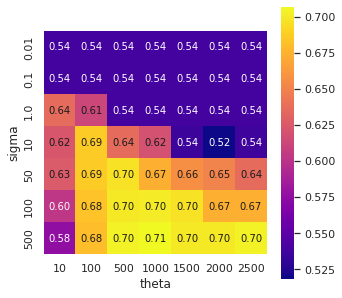

In [22]:
lst = ['age','sex'] 
ldf3 = df[lst+lst_ecg]
modelEval(ldf3,lst_theta,lst_sig)

Age & Sex didn't actually seem to add anything to improve the ECG model

# Feature Type Based Model
We have two sets of feature types; numerical and categorical. Categorical features were applied a OHE modification, creating new feautres for every unique feature case. The two models are evaluated individually & ensemble approach is attempted.

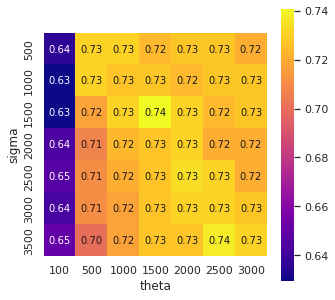

In [23]:
''' Numerical Features Model '''
lst_theta = [100, 500, 1000, 1500, 2000, 2500,3000]
lst_sig = [500,1000,1500,2000,2500,3000,3500]

df_num = df[numvars_targ].copy()
modelEval(df_num,lst_theta,lst_sig)

In [24]:
lst_ldf3 = modelEval3(df_num,hyp=[1500,1500],pred_upd=None)

Training Score: 0.7584541062801933
Test Score: 0.7333333333333333


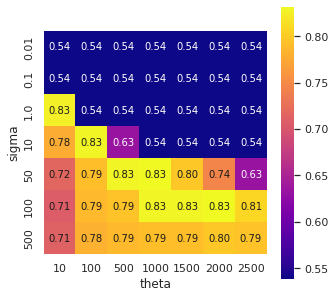

In [25]:
''' Categorical Feature Model '''
lst_theta = [10,100, 500, 1000, 1500, 2000, 2500]
lst_sig = [0.01,0.1,1.0,10,50,100, 500]
modelEval(df_ohe,lst_theta,lst_sig)

In [26]:
''' Ensemble Modification of Categorical Feature Model ''' 
modelEval3(df_ohe,hyp=[100,50],pred_upd=lst_ldf3)

Training Score: 0.8599033816425121
Test Score: 0.8888888888888888


# SUMMARY - FEATURE BASED MODELS
The numerical feature only, consisting of a mixture of various feature types performed very similar to other tested models, peaking at a cross validation mean score of 0.74;
The OHE categorical feature set was more promising, consistenly scoring over 0.83, which is the best individual subgroup model so far.
Both Training/Test sets perform relatively similar, even with the ensemble posterior prediction adjustment, which is encouraging
Cross Validation outlined various hyperparameters that give a mean cv score of 0.83, all of which give slightly different outcomes on train/test split, ranging from roughtly 0.8 to 0.89 for the test set, which seems to benefit the most from ensembling

# Logistic Rgression

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop("condition",axis="columns")
y = df.condition
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [28]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred1 = clf1.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score of logistic regression",accuracy_score(y_test,y_pred1))

Accuracy score of logistic regression 0.8166666666666667


In [31]:
confusion_matrix(y_test,y_pred1)

array([[25,  7],
       [ 4, 24]])

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_test, y_pred1))
print('Recall: %.3f' % recall_score(y_test, y_pred1))
print('F1 Score: %.3f' % f1_score(y_test, y_pred1))


Precision: 0.774
Recall: 0.857
F1 Score: 0.814


# Conclusion
In this code, we looked at a simple way of turning a regressor into a basic classifier, which makes it compatible with GridSearchCV, Pipeline & Score functions & by default our evaluation results are all accuracy evaluations.
A true classifier would require some additional reworking in terms of class structure, nevertheless it was quite an interesting experiment, seeing whether a regressor right out of the box would work as a simple classifier.